# Simulating and studying an AR process

In [19]:
import numpy as np
from pandas import DataFrame as df
import importlib
import autoregressive as ar
from tqdm import trange

In [20]:
importlib.reload(ar) # if autoregressive.py is modified 

<module 'autoregressive' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\autoregressive.py'>

In [21]:
model1 = ar.AutoRegressive(steps=1_000, paths=3, a=np.array([0.2,0.5,-0.4]))

data = model1.generate()

100%|██████████| 998/998 [00:00<00:00, 219123.46it/s]

3 different AR(2) processes of 1000 steps have been generated with increments following normal distribution


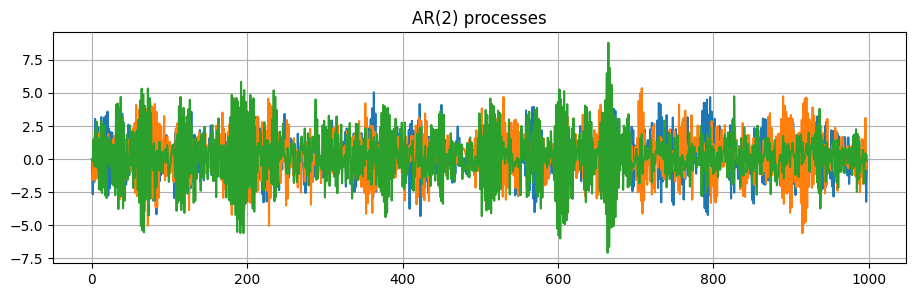

In [22]:
model1.plot_paths()

In [23]:
coefficients = model1.fit_ar()
df(coefficients).head()

,0,1,2
0,0.186568,0.214528,0.169054
1,0.503838,0.513095,0.469954
2,-0.356374,-0.374302,-0.444007


In [30]:
errors = model1.get_errors()

print(df(errors).head())
df(errors).describe()


100%|██████████| 998/998 [00:00<00:00, 366735.18it/s]

          0         1         2
0  0.000000  0.000000  0.000000
1 -2.666241 -0.147969 -0.170798
2  0.731270 -1.626202  1.486821
3 -1.715018  1.591023 -0.538772
4  3.035344 -1.371548  2.180518


,0,1,2
count,999.000000,999.000000,999.000000
mean,0.216701,0.246635,0.174322
std,1.654649,1.820974,2.141474
min,-4.314525,-5.611128,-7.084382
25%,-0.894871,-0.977070,-1.140032
50%,0.181095,0.322212,0.170315
75%,1.386538,1.485474,1.453666
max,5.037951,5.364375,8.791784
